## Exploratory Data Analysis of MBA Students

In this project, we aim to perform an exploratory data analysis of MBA students to uncover valuable insights. The analysis will focus on summarizing the data, identifying trends, and visualizing distributions and patterns. This EDA process will help us better understand the dataset and highlight significant observations.

Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the file and preparing it for use"

file_path = r"E:\DATA IS GOOD\EDA_MBA\Data\MBA.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


### About the Columns
- application_id: A unique identifier assigned to each application.
- gender: The applicant's gender (e.g., Male, Female).
- international: Indicates if the applicant is an international student (TRUE/FALSE).
- gpa: Grade Point Average of the applicant (on a 4.0 scale).
- major: The applicant's undergraduate major (e.g., Business, STEM, Humanities).
- race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other). For international students, this field may be null.
- gmat: GMAT score of the applicant (maximum score: 800).
- work_exp: The number of years of work experience (measured in years).
- work_industry: The industry where the applicant gained their previous work experience (e.g., Consulting, Finance, Technology, etc.).
- admission: Admission status of the applicant (e.g., Admit, Waitlist, Null for Deny).



1. Application_id

Let's begin by analyzing the application_id to determine if it holds any significance for our analysis.

In [4]:
print(f"application_id has {df['application_id'].isnull().sum()} null values")
print(f"application_id has {df['application_id'].duplicated().sum()} repeating values")

application_id has 0 null values
application_id has 0 repeating values


**The application_id column contains no null values and no duplicate values. This indicates that it simply serves as a unique identifier for each record, effectively functioning as an index. Therefore, it does not provide any meaningful insights for exploratory data analysis. We can safely drop this column and use the default indexing instead.**

In [5]:
df = df.drop("application_id", axis = 1)

Now, let's take an overview of the data by examining its shape, size, and other key attributes.

In [6]:
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [7]:
print(f"The data has total {df.size} entries with {df.shape[0]} rows and {df.shape[1]} columns")

The data has total 55746 entries with 6194 rows and 9 columns


In [8]:
print(f"The dataset has {df.duplicated().sum()} duplicate values")
print("We found 30 duplicate entries in the dataset.\nHowever, we cannot drop them because although the entries appear identical, they are not true duplicates.\nAs we previously observed, the student_id values are different, indicating that these records are not errors.\nIt is simply a coincidence that some of the entries are the same.")

The dataset has 30 duplicate values
We found 30 duplicate entries in the dataset.
However, we cannot drop them because although the entries appear identical, they are not true duplicates.
As we previously observed, the student_id values are different, indicating that these records are not errors.
It is simply a coincidence that some of the entries are the same.


In [9]:
df.isnull().sum()

gender              0
international       0
gpa                 0
major               0
race             1842
gmat                0
work_exp            0
work_industry       0
admission        5194
dtype: int64

In [10]:
null_race_values = df["race"].isnull().sum()
print(f"The null values consist of {round((null_race_values/len(df)) * 100)} % of the total values in this feature")
print("These missing values likely correspond to international students.\nTo address this, it would be best to replace the null values with 'International' to reflect this information.")

The null values consist of 30 % of the total values in this feature
These missing values likely correspond to international students.
To address this, it would be best to replace the null values with 'International' to reflect this information.


In [11]:
df["race"].fillna("International", inplace= True)
df["race"].value_counts()

race
International    1842
White            1456
Asian            1147
Black             916
Hispanic          596
Other             237
Name: count, dtype: int64

We should create a copy of the data to ensure that the original dataset remains unchanged during our analysis and preprocessing steps.

In [12]:
df2 = df.copy()

Now, let's examine each feature one by one to gain a deeper understanding of the data.

**1. Selected**

This feature indicates whether the candidate has been selected or not. It shows the admission status of the applicant (e.g., 'Admit', 'Waitlist', 'Deny')

In [13]:
df2.admission.value_counts()

admission
Admit       900
Waitlist    100
Name: count, dtype: int64

*There are currently three admission status variables: 'Admit', 'Waitlist', and 'Deny'. To simplify the analysis, it would be beneficial to consolidate these into two categories: 'Accepted' and 'Rejected', where 'Admit' is considered 'Accepted' and both 'Waitlist' and 'Deny' are considered 'Rejected'*

In [14]:
waitlist = df2['admission'].value_counts()['Waitlist']
waitlist_total_percentage = round((waitlist/len(df2['admission'])) * 100, 2)
waitlist_passed_percentage = round((waitlist/df2['admission'].notnull().sum()) * 100, 2)
print(f"The admission feature contains {waitlist} entries labeled as 'Waitlist'.\nwhich represents {waitlist_total_percentage} % of the total candidates and {waitlist_passed_percentage} % of the selected + waitlisted candidates.") 
print("To simplify the analysis and make the evaluation clearer, it would be beneficial to treat the 'Waitlist' candidates as 'Selected'.")



The admission feature contains 100 entries labeled as 'Waitlist'.
which represents 1.61 % of the total candidates and 10.0 % of the selected + waitlisted candidates.
To simplify the analysis and make the evaluation clearer, it would be beneficial to treat the 'Waitlist' candidates as 'Selected'.


In [15]:
df2["admission"].loc[df2['admission'] == "Waitlist"] = "Admit"

#one hot encoding for selected candidates
encoded_target = pd.get_dummies(df2["admission"])
df2 = pd.concat([df2, encoded_target], axis = 1)

# dropping the admission column as it is of no more use and renaming admit column to selected
df2.drop("admission", axis = 1, inplace= True)
df2.rename(columns=({'Admit' : "selected"}), inplace= True)

In [16]:
df2.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,selected
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,True
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,False
2,Female,True,3.30,Business,International,710.0,5.0,Technology,True
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,False
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,False


To ensure a seamless appearance and consistency in our analysis, we are setting some standard values for the settings

In [17]:
color = ["skyblue", "blue"]
linewidth = 1.5
edge_color = "black"

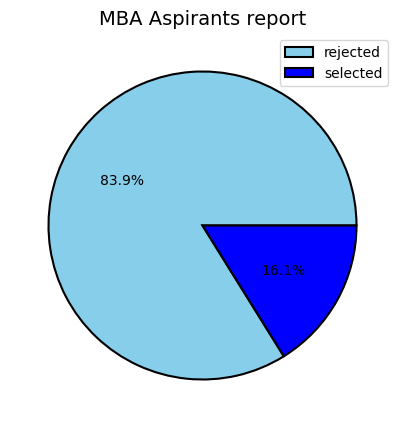

In [18]:
labels = ["rejected", "selected"]
plt.figure(figsize=(12,5))
plt.pie(df2["selected"].value_counts(), autopct= "%1.1f%%", wedgeprops={"edgecolor":edge_color, "linewidth" : linewidth}, colors=color)
plt.legend(labels)
plt.title("MBA Aspirants report", size = 14)
plt.show()


**Only 16% of candidates who took the MBA entrance exam are qualified for admission or placed on the waiting list. This suggests that the exam is challenging, and not everyone is able to qualify for the MBA program.**

**2. Gender**

In [19]:
df2["gender"].value_counts()

gender
Male      3943
Female    2251
Name: count, dtype: int64

In [20]:
df2.groupby("gender")["selected"].value_counts()

gender  selected
Female  False       1751
        True         500
Male    False       3443
        True         500
Name: count, dtype: int64

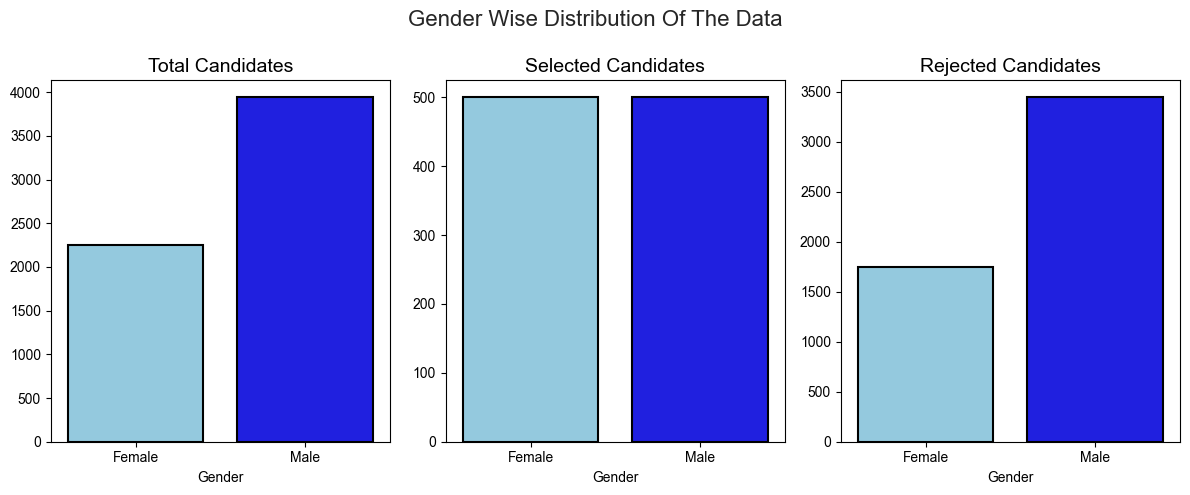

In [21]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols = 3, figsize = (12,5))
sns.set_style("whitegrid")

group_by_gender = df2.groupby("gender").size()
ax1 = sns.barplot(data=group_by_gender, palette=color, ax=ax1, edgecolor = edge_color, linewidth = linewidth)
ax1.set_xlabel("Gender")
ax1.set_title("Total Candidates", size = 14)

passed_candidates = df2.loc[df2["selected"] == True]
passed_candidates = passed_candidates.groupby("gender").size()
ax2 = sns.barplot(data = passed_candidates, palette=color, ax = ax2, edgecolor = edge_color, linewidth = linewidth)
ax2.set_xlabel("Gender")
ax2.set_title("Selected Candidates", size = 14)

failed_candidates = df2.loc[df2["selected"] == False]
failed_candidates = failed_candidates.groupby("gender").size()
ax3 = sns.barplot(data = failed_candidates, ax = ax3, palette=color, edgecolor = edge_color, linewidth = linewidth)
ax3.set_xlabel("Gender")
ax3.set_title("Rejected Candidates", size = 14)

plt.tight_layout()
plt.subplots_adjust(top = 0.84)
fig.suptitle("Gender Wise Distribution Of The Data", size = 16)
plt.show()

The graph shows that, despite having fewer female candidates compared to male candidates, the number of female candidates selected is equal to that of male candidates.

**Insights**
- Female candidates are less likely to take the MBA entrance exam.
- The number of male and female candidates selected for admission to MBA colleges is equal.

**3. International**

In [22]:
df2.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,selected
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,True
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,False
2,Female,True,3.30,Business,International,710.0,5.0,Technology,True
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,False
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,False


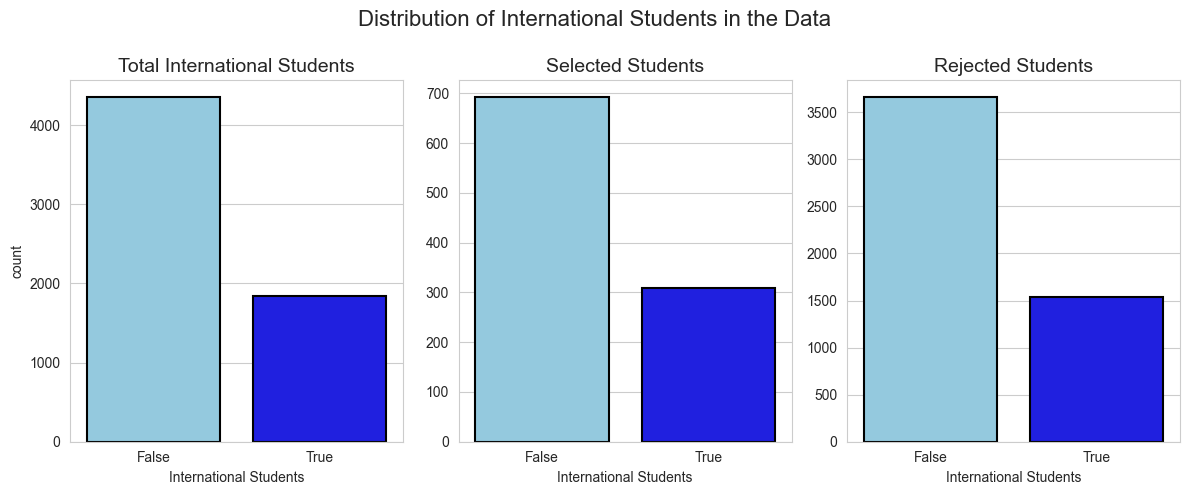

In [23]:
international_students = df2.loc[df2["selected"] == True]
international_students = international_students.groupby("international").size()

non_international_students = df2.loc[df2["selected"] == False]
non_international_students = non_international_students.groupby("international").size()

############################################################################3

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (12,5))
sns.set_style("whitegrid")

ax1 = sns.barplot(data = df2["international"].value_counts(), ax = ax1, palette=color, edgecolor = edge_color, linewidth = linewidth)
ax1.set_xlabel("International Students")
ax1.set_title("Total International Students", size = 14)

ax2 = sns.barplot(data = international_students, ax = ax2, palette=color, edgecolor = edge_color, linewidth = linewidth)
ax2.set_xlabel("International Students")
ax2.set_title("Selected Students", size = 14)

ax3 = sns.barplot(data = non_international_students, ax = ax3, palette=color, edgecolor = edge_color, linewidth = linewidth)
ax3.set_xlabel("International Students")
ax3.set_title("Rejected Students", size = 14)

plt.tight_layout()
plt.subplots_adjust(top = 0.84)
fig.suptitle("Distribution of International Students in the Data", size = 16)
plt.show()

**Insights**
- Approximately 40% of the total candidates who took the MBA entrance exam are international students.
- Around 40% of the total students who were selected for admission are international students.
- Around 40% of the total students who were not selected for admission are international students.

**3. GPA**

Grade Point Average of the applicant (on a 4.0 scale).

In [24]:
df2["gpa"].describe()

count    6194.000000
mean        3.250714
std         0.151541
min         2.650000
25%         3.150000
50%         3.250000
75%         3.350000
max         3.770000
Name: gpa, dtype: float64

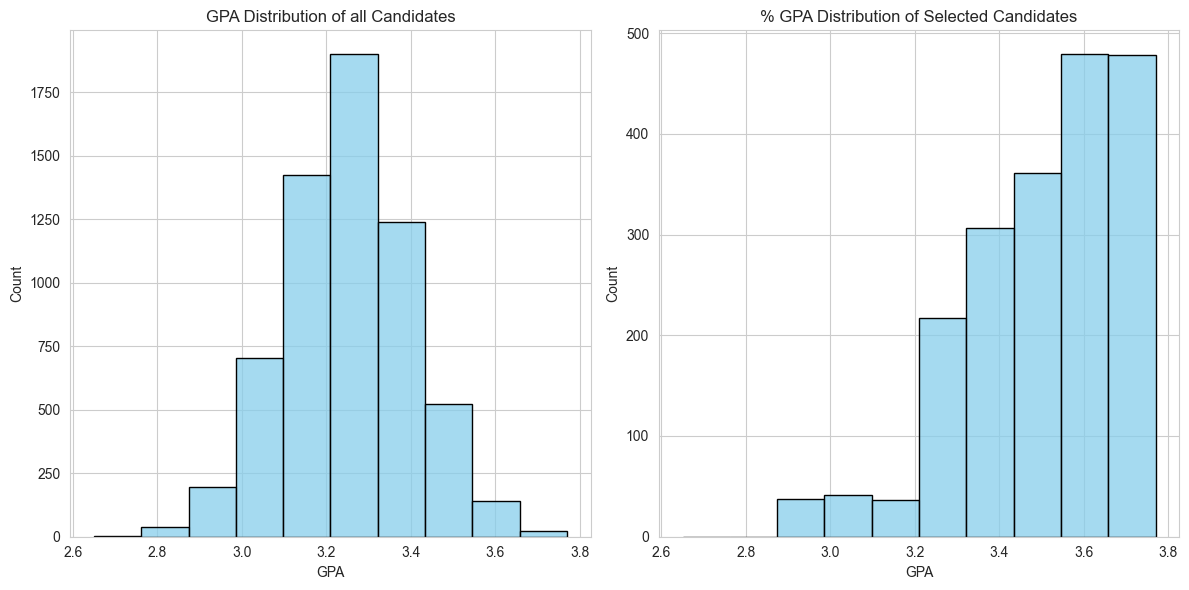

In [25]:
gpa = df2.groupby("gpa").size().reset_index(name = "count")

#selected students only
selected = df2.loc[df2["selected"] == True]
selected = selected.groupby("gpa").size().reset_index(name = "count")

#merging the data to get the gpa percentage of selected students 
merged_gpa = gpa.merge(selected, on="gpa", how="left", validate="one_to_one")
merged_gpa["count_y"].fillna(0, inplace=True)
merged_gpa["merged_gpa"] = (merged_gpa["count_y"]/merged_gpa["count_x"]) * 100 
merged_gpa

########################################################################################

fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,6))

sns.histplot(x = gpa["gpa"], weights= gpa["count"],bins = 10, color=color[0], edgecolor = edge_color, ax = ax1)
ax1.set_title("GPA Distribution of all Candidates")
ax1.set_xlabel("GPA")
ax1.set_ylabel("Count")

sns.histplot(x = merged_gpa["gpa"], weights= merged_gpa["merged_gpa"],bins = 10, color=color[0], edgecolor = edge_color, ax=ax2)
ax2.set_title("% GPA Distribution of Selected Candidates")
ax2.set_xlabel("GPA")
ax2.set_ylabel("Count")

plt.tight_layout()
plt.show()

**Insights**
- Candidates with varying GPAs have taken the exam, but the majority fall within the 3.0 - 3.4 GPA range, which is expected.
- Candidates with low GPAs have a very low chance of admission, as shown in the figure. As your GPA increases, your chances of admission also improve.

**4. Major**

There are three types of candidates who took the MBA exam: Humanities, Business, and STEM. We will analyze this data to extract some useful insights. These Majors are from Candidates Undergraduate Education

In [26]:
selected = df2.loc[df2["selected"] == True]
selected.groupby("selected")["major"].value_counts()

selected  major     
True      Humanities    408
          STEM          300
          Business      292
Name: count, dtype: int64

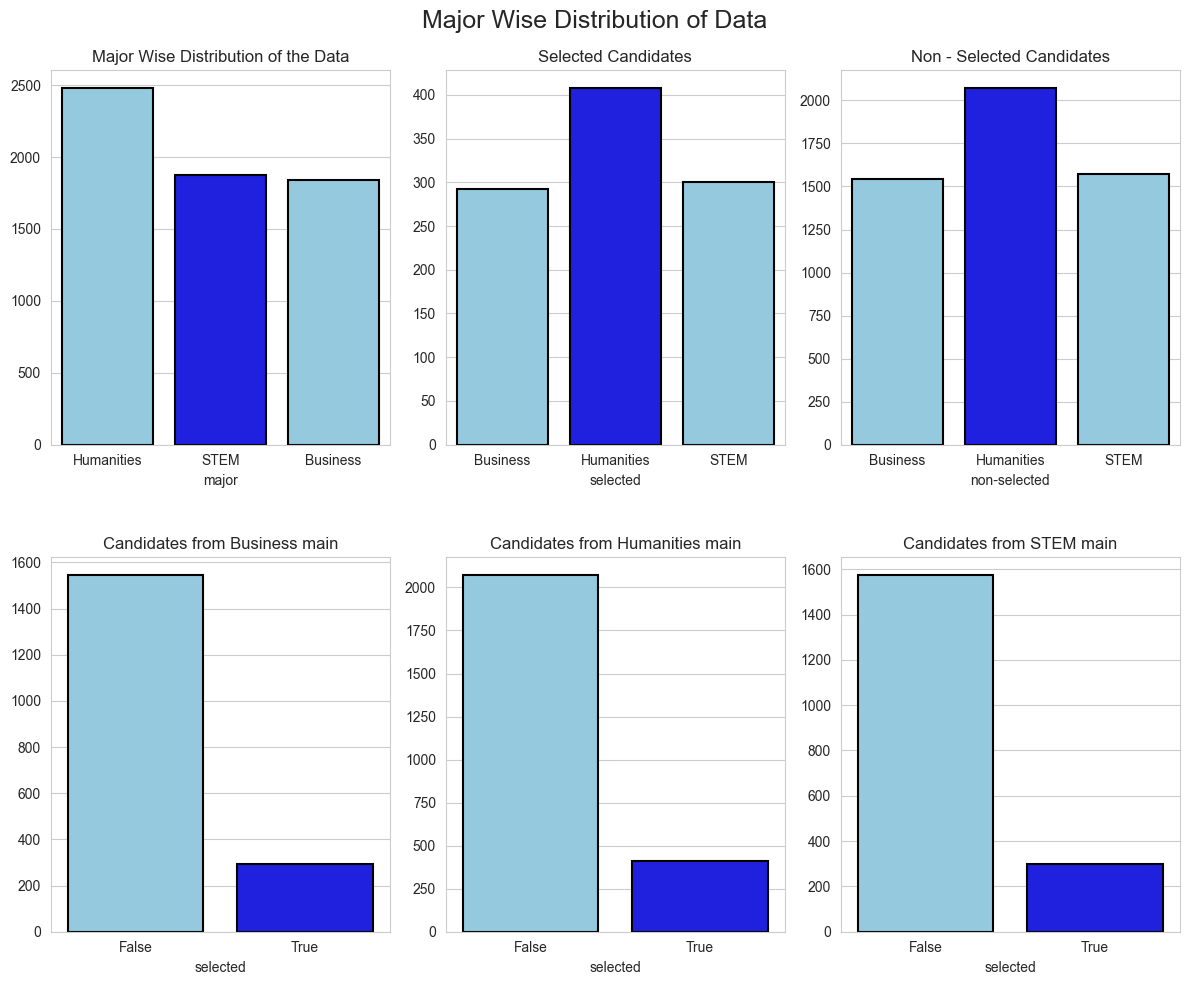

In [27]:
major_distribution = df2["major"].value_counts()

selected = df2.loc[df2["selected"] == True]
selected = selected.groupby("major")["selected"].size()

un_selected = df2.loc[df2["selected"] == False]
un_selected = un_selected.groupby("major")["selected"].size()

business = df2.loc[df2["major"] == "Business"]
business = business["selected"].value_counts()

humanities = df2.loc[df2["major"] == "Humanities"]
humanities = humanities["selected"].value_counts()

STEM = df2.loc[df2["major"] == "STEM"]
STEM = STEM["selected"].value_counts()

#################################################################################

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols = 3, figsize = (12,10))
sns.set_style("whitegrid")

ax1 = sns.barplot(data = major_distribution, ax = ax1, palette = color, edgecolor = edge_color, linewidth = linewidth)
ax1.set_xlabel("major")
ax1.set_ylabel(None)
ax1.set_title("Major Wise Distribution of the Data")

ax2 = sns.barplot(data = selected, ax = ax2, palette = color, edgecolor = edge_color, linewidth = linewidth)
ax2.set_xlabel("selected")
ax2.set_ylabel(None)
ax2.set_title("Selected Candidates")

ax3 = sns.barplot(data = un_selected, ax = ax3, palette = color, edgecolor = edge_color, linewidth = linewidth)
ax3.set_xlabel("non-selected")
ax3.set_ylabel(None)
ax3.set_title("Non - Selected Candidates")

ax4 = sns.barplot(data = business, ax = ax4, palette = color, edgecolor = edge_color, linewidth = linewidth)
ax4.set_xlabel("selected")
ax4.set_ylabel(None)
ax4.set_title("Candidates from Business main")

ax5 = sns.barplot(data = humanities, ax = ax5, palette = color, edgecolor = edge_color, linewidth = linewidth)
ax5.set_xlabel("selected")
ax5.set_ylabel(None)
ax5.set_title("Candidates from Humanities main")

ax6 = sns.barplot(data = STEM, ax = ax6, palette = color, edgecolor = edge_color, linewidth = linewidth)
ax6.set_xlabel("selected")
ax6.set_ylabel(None)
ax6.set_title("Candidates from STEM main")

plt.tight_layout()
plt.subplots_adjust(top = 0.92)
fig.suptitle("Major Wise Distribution of Data", size = 18)
plt.subplots_adjust(hspace=0.30)
plt.show()


**Insights**
- Humanities students make up the majority of candidates taking the MBA exam.
- Each major has nearly the same percentage of candidates selected. However, since the number of Humanities candidates taking the exam is the highest, the largest number of selected candidates also comes from Humanities.
- To maintain a balance between the majors, we should consider offering waivers to STEM and Business students to attract more of them to the course

**5. Race**

In [28]:
df2["race"].value_counts()

race
International    1842
White            1456
Asian            1147
Black             916
Hispanic          596
Other             237
Name: count, dtype: int64

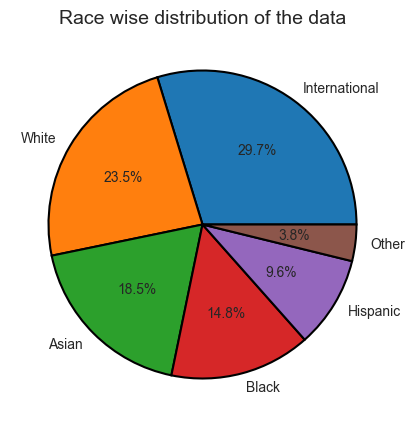

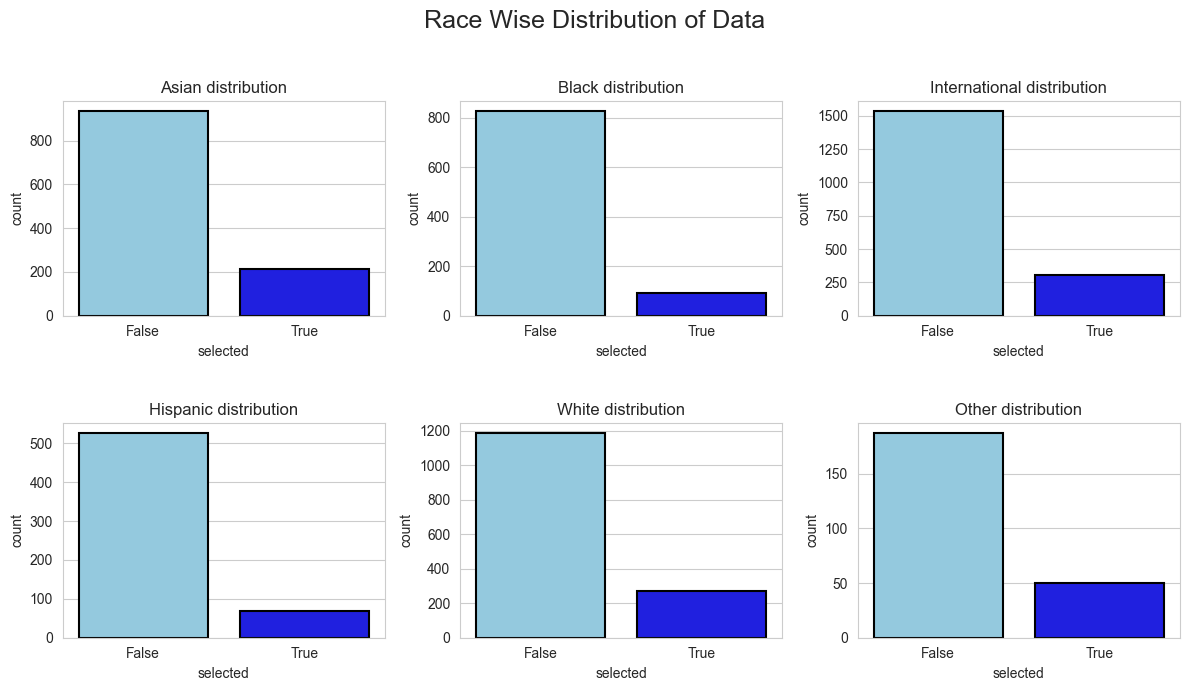

In [29]:
race_distribution = df2["race"].value_counts()

plt.figure(figsize=(12,5))
plt.pie(race_distribution, autopct= "%1.1f%%", wedgeprops={"edgecolor":edge_color, "linewidth" : linewidth}, labels = race_distribution.index)
plt.title("Race wise distribution of the data", size = 14)
plt.show()

#################################################################################

races = ['Asian', 'Black', 'International', 'Hispanic', 'White', 'Other']

fig,((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize = (12,7))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for i, race_name in enumerate(races):
    race = df2.loc[df2["race"] == race_name]
    race = race.groupby("selected").size()
    
    axes[i] = sns.barplot(data=race, palette=color, edgecolor = edge_color, linewidth = linewidth, ax = axes[i])
    axes[i].set_xlabel("selected")
    axes[i].set_ylabel("count")
    axes[i].set_title(f"{race_name} distribution", size = 12)

plt.tight_layout()
plt.subplots_adjust(top = 0.85)
fig.suptitle("Race Wise Distribution of Data", size = 18)
plt.subplots_adjust(hspace=0.50)
plt.show()


**Insights**
- Based on the pie chart, it is unclear about the race of the majority of candidates who took the MBA exam. However, since the university is in Europe, most candidates are White, followed closely by Asian candidates. Black candidates follow, and Hispanic candidates are the least likely to take the exam, if we ignore the 'Other' category.
- When it comes to selection, candidates from 'Other' racial backgrounds have the highest chances of being selected, followed by White candidates, Asian candidates, international candidates, and finally, Hispanic and Black candidates, who have the lowest percentage of selection.

**6. GMAT Score**

In [30]:
df2["gmat"].describe()

count    6194.000000
mean      651.092993
std        49.294883
min       570.000000
25%       610.000000
50%       650.000000
75%       680.000000
max       780.000000
Name: gmat, dtype: float64

The minimum score is 570, the maximum is 780, and the mean score is 651. Interestingly, the data is evenly distributed.

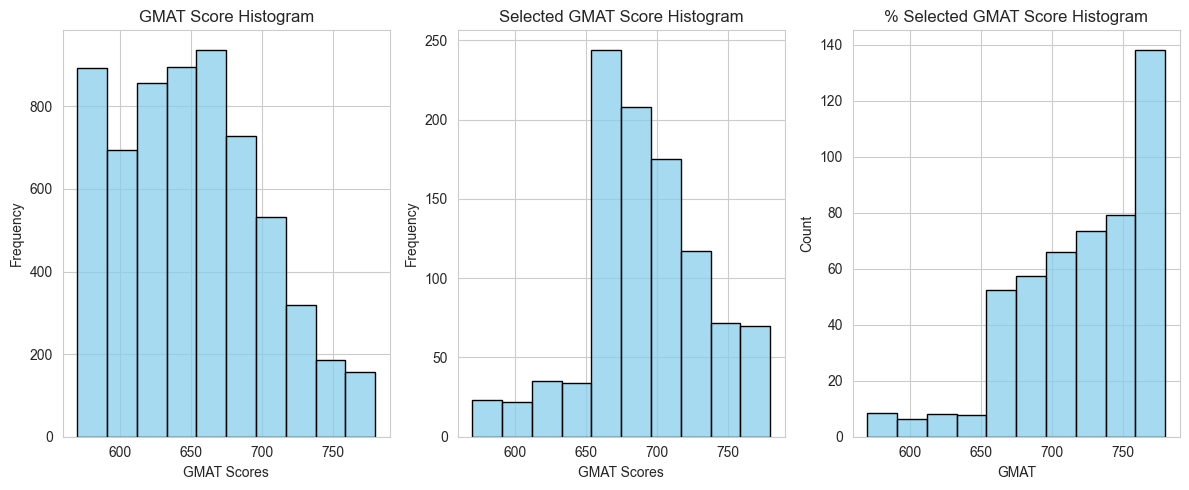

In [31]:
gmat = df2.groupby("gmat").size().reset_index(name="count")

selected = df2.loc[df2["selected"] == True]
selected = selected.groupby("gmat").size().reset_index(name="count")

merged_gmat = gmat.merge(selected, on="gmat", how="left", validate="one_to_one")
merged_gmat["count_y"].fillna(0, inplace=True)
merged_gmat["merged_GMAT"] = (merged_gmat["count_y"]/merged_gmat["count_x"]) * 100 

# Create subplots with 3 columns
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

sns.histplot(data=gmat, x="gmat", weights="count", bins=10, color=color[0], edgecolor=edge_color, ax=ax1)
ax1.set_xlabel("GMAT Scores")
ax1.set_ylabel("Frequency")
ax1.set_title("GMAT Score Histogram")

sns.histplot(data=selected,x = "gmat", weights= "count", bins=10, color=color[0], edgecolor=edge_color, ax = ax2)
ax2.set_xlabel("GMAT Scores")
ax2.set_ylabel("Frequency")
ax2.set_title("Selected GMAT Score Histogram")

sns.histplot(x = merged_gmat["gmat"], weights= merged_gmat["merged_GMAT"],bins = 10, color=color[0], edgecolor = edge_color, ax=ax3)
ax3.set_title("% Selected GMAT Score Histogram")
ax3.set_xlabel("GMAT")
ax3.set_ylabel("Count")

plt.tight_layout()
plt.show()


**Insights**

- There doesn't seem to be a strict minimum GMAT score required to qualify for the MBA program, or perhaps the minimum qualifying score is 570.
- Interestingly, even with the highest GMAT score, admission is not guaranteed, and it is possible to be admitted with a minimum score.
- However, as shown in Graph 3, as your GMAT score increases, your chances of admission also increase

**7. Work Experience**

Candidates applying for the MBA program may have varying years of work experience, which could influence their chances of admission. Let's explore whether this is true.

Text(0.5, 0.98, 'Work Experience of Candidates')

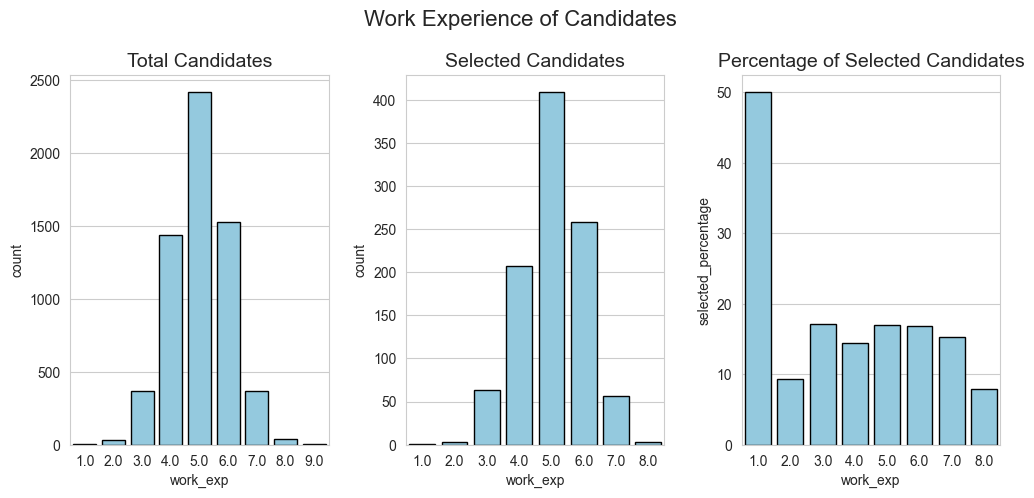

In [32]:
workEx = df2.groupby("work_exp").size().reset_index(name = "count")
workExp = df2.groupby("selected")["work_exp"].value_counts().reset_index(name = "count")
selected = workExp.loc[workExp["selected"] == True]

# percentage of selected candidates
selected_percentage = selected.merge(workEx, on="work_exp", validate="one_to_one")
selected_percentage["selected_percentage"] = (selected_percentage["count_x"] / selected_percentage["count_y"]) * 100
selected_percentage


fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (12,5))

sns.barplot(data=workEx,x="work_exp", y = "count",ax = ax1, color=color[0], edgecolor = edge_color)
ax1.set_title("Total Candidates", fontsize = 14)

sns.barplot(data=selected, x="work_exp", y = "count", ax = ax2, color=color[0], edgecolor = edge_color)
ax2.set_title("Selected Candidates", fontsize = 14)

sns.barplot(data=selected_percentage, x="work_exp", y = "selected_percentage", ax = ax3, color=color[0], edgecolor = edge_color)
ax3.set_title("Percentage of Selected Candidates", fontsize = 14)

fig.subplots_adjust(top = 0.85, wspace=0.3)
fig.suptitle("Work Experience of Candidates", fontsize = 16)


**"Insights"**
- Work experience does not seem to play a significant role in the selection process, as candidates with both 1 year and 8 years of experience are being admitted.
- Candidates with 3 to 6 years of work experience have the highest chances of being selected for admission.

**8. Work Industry**

The industry where the applicant gained their previous work experience (e.g., Consulting, Finance, Technology, etc.).

<Figure size 1200x600 with 0 Axes>

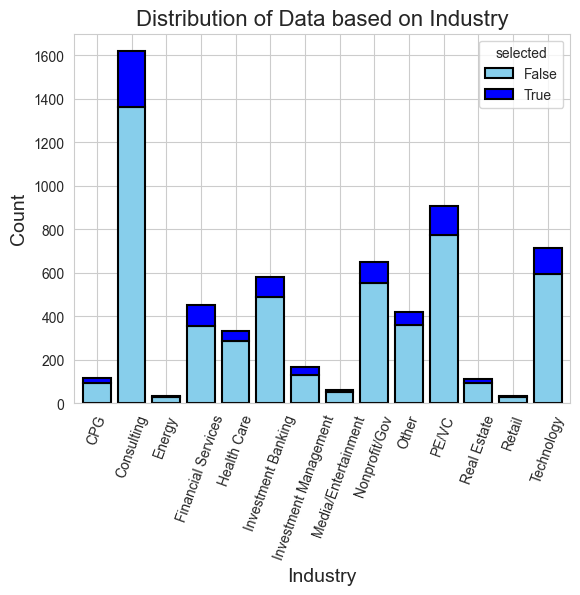

In [33]:
industry = df2.groupby("work_industry")["selected"].value_counts()
industry = industry.unstack(level="selected")
#############################################################################

plt.figure(figsize=(12,6))
industry.plot(kind = "bar", stacked = True, color = color, edgecolor = edge_color, linewidth = linewidth, width = 0.8) 
plt.xticks(rotation = 70, fontsize = 10)
plt.ylabel("Count", fontsize = 14)
plt.xlabel("Industry", fontsize = 14)
plt.title("Distribution of Data based on Industry", fontsize = 16)
plt.show()

**Insights**
- The majority of candidates come from the consulting industry, which is why the highest number of selected candidates are from consulting.
- The least number of candidates come from the retail, investment management, and energy sectors. The university should consider offering score waivers to attract more candidates from these sectors and promote diversity in experience within the course.
- Other sectors have an average number of candidates applying, with a similar proportion getting selected.

In [34]:
################        END         ##################